In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [43]:
url = 'https://raw.githubusercontent.com/mridulrb/Predict-loan-eligibility-using-IBM-Watson-Studio/master/Dataset/Dataset.csv'
train = pd.read_csv(url, error_bad_lines=False)

In [44]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [46]:
train.columns
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [47]:
#12 indeppended variables and one target variable.

In [48]:
train.shape


(614, 13)

In [49]:
train['Loan_Status'].value_counts(normalize= True)


Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

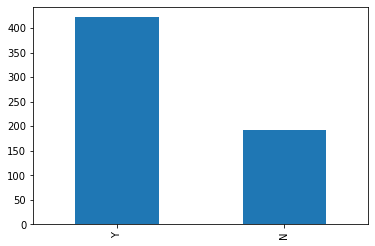

In [50]:
train['Loan_Status'].value_counts().plot.bar()

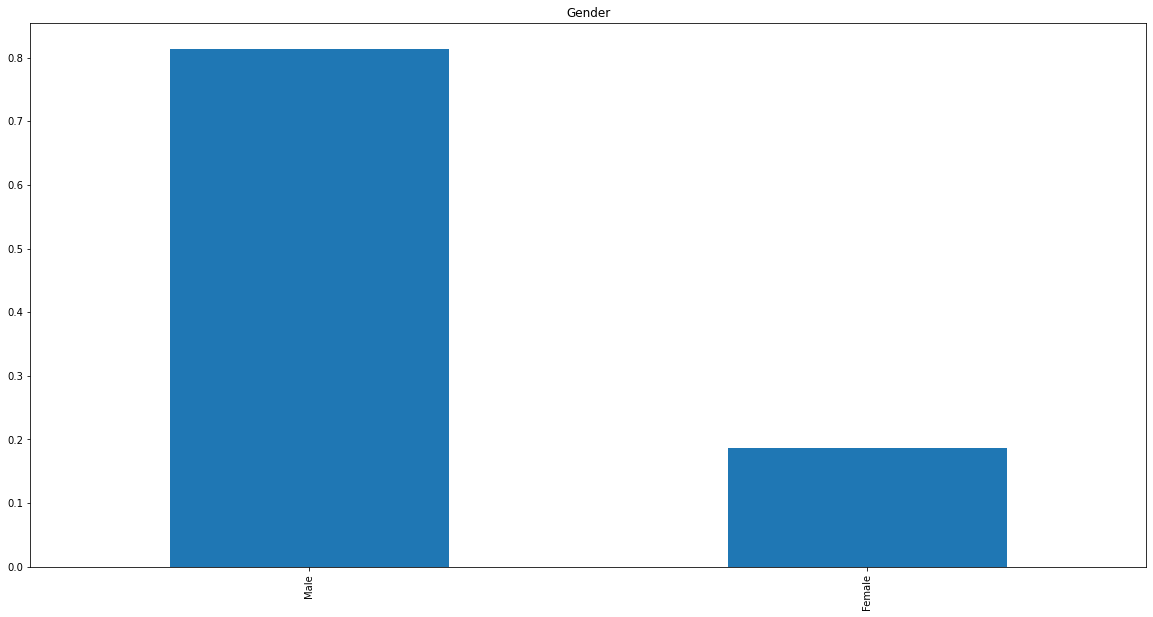

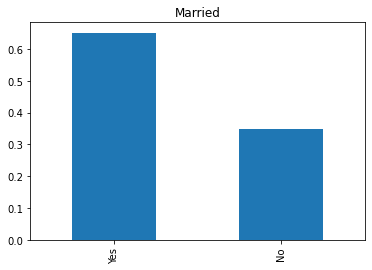

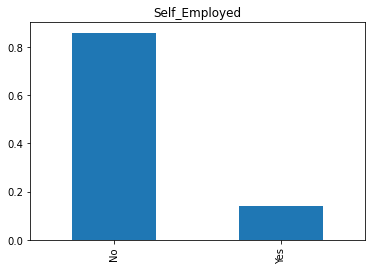

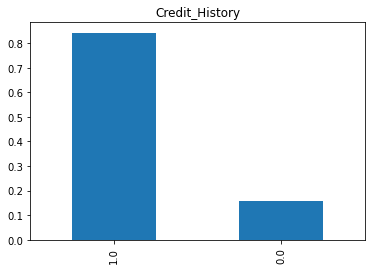

In [51]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.show()
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

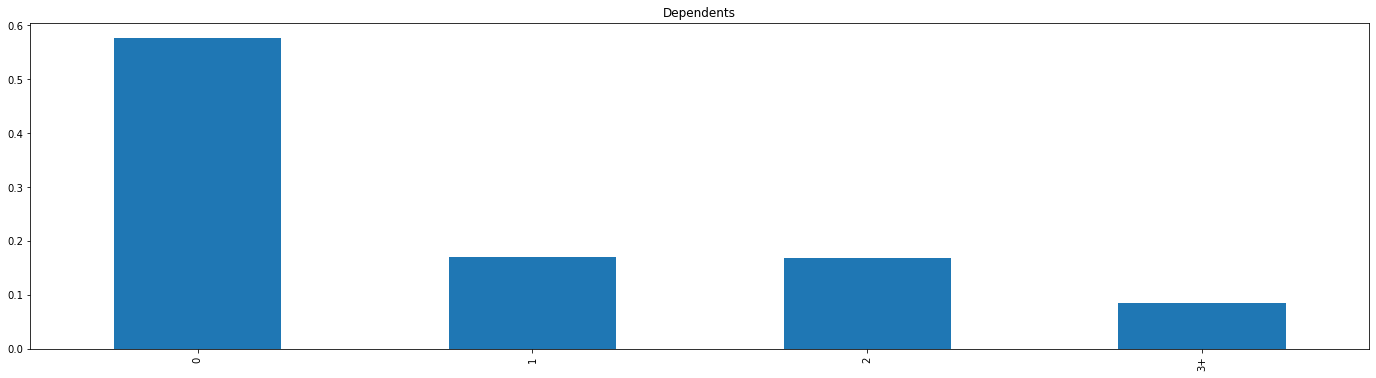

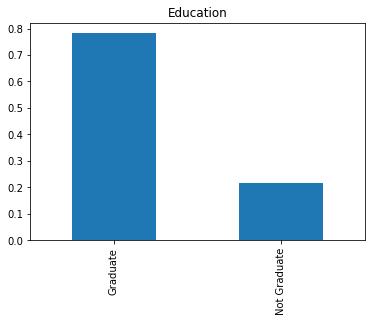

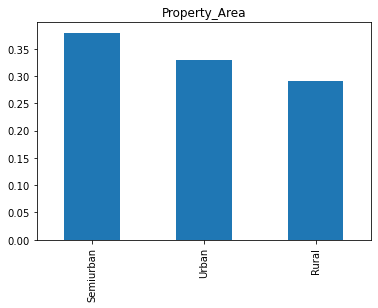

In [52]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.show()
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

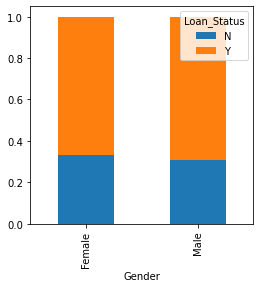

In [53]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

In [54]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:
#There are a lot of missing values such as Gender, Married, Dependents etc. 
#For numerical variables: imputation using mean or median
#For categorical variables: imputation using mod

In [56]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [57]:
train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [58]:
train['Loan_Amount_Term'].value_counts()


360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [59]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [60]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [61]:
train.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [62]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [63]:
train[['Gender']]

,Gender
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
609,Female
610,Male
611,Male
612,Male


In [64]:
train['Married'].replace(['No','Yes'],[0,1],inplace=True)


In [65]:
train[['Loan_Status']]

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y
...,...
609,Y
610,Y
611,Y
612,Y


In [66]:
train['Gender'].replace(['Female','Male'],[0,1],inplace=True)


In [67]:
train['Loan_Status'].replace(['N','Y'],[0,1],inplace=True)


In [68]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [69]:
X = train[['Gender', 'Married','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]
Y = train[['Loan_Status']]

In [70]:
train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [71]:
train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [72]:
train[['Property_Area']].dtypes

Property_Area    object
dtype: object

In [73]:
train['Property_Area'].replace(to_replace = ['Urban', 'Rural', 'Semiurban'],  value = [1,0,2],inplace=True)

In [74]:
train[['Property_Area']]

,Property_Area
0,1
1,0
2,1
3,1
4,1
...,...
609,0
610,0
611,1
612,1


In [75]:
X = train[['Gender', 'Married', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']].values
Y = train[['Loan_Status']].values

In [76]:
train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [78]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
# training Linear Regression model on training data
LogReg.fit(X_train, Y_train)
# The coefficients
print ('Coefficients: ', LogReg.coef_)
print ('Intercept: ',LogReg.intercept_)

Coefficients:  [[ 2.99696787e-02  6.03551193e-01  9.42844292e-06 -5.69269329e-05
  -3.15942376e-03 -5.62931947e-03  2.98672948e+00  2.56748472e-01]]
Intercept:  [0.09468353]


C:\Users\Yagna\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [79]:
from sklearn.metrics import confusion_matrix

y_pred = LogReg.predict(X_test)
ypred_prob = LogReg.predict_proba(X_test)
ypred_prob

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(Y_test, y_pred)

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (C:\Users\Yagna\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [80]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
# training Linear Regression model on training data
svc.fit(X_train, Y_train)# The coefficients


C:\Users\Yagna\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [81]:
Y_pred = svc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.69      0.99      0.81       106

    accuracy                           0.68       154
   macro avg       0.34      0.50      0.41       154
weighted avg       0.47      0.68      0.56       154



In [82]:
Y_pred = svc.predict(X_test)


In [83]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))


Accuracy: 0.6818181818181818


In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
# training Linear Regression model on training data
rfc.fit(X_train, Y_train)


<ipython-input-84-7d025de98311>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)


RandomForestClassifier()

In [85]:
y_pred = rfc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.48      0.57        48
           1       0.80      0.92      0.85       106

    accuracy                           0.78       154
   macro avg       0.76      0.70      0.71       154
weighted avg       0.77      0.78      0.76       154



In [88]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
## Finding how much loan a person can get 

In [90]:
train2 = train[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]

In [97]:
train2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,No,5849,0.0,128.0,360.0,1.0,1,1
2,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,1,1,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,0,1
609,LP002978,0,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,1,1


In [96]:

train2.drop(train2[train2['Loan_Status'] == 0].index, inplace = True) 


In [ ]:
#Predicting how much loan will they get 

In [102]:
x = train[['Gender', 'Married','ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Loan_Status']]
y = train[['LoanAmount']]

In [103]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y)

In [104]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
# training Linear Regression model on training data
svc.fit(x_train, y_train)# The coefficients


C:\Users\Yagna\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [105]:
y_pred = svc.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         9.0       0.00      0.00      0.00         1
        17.0       0.00      0.00      0.00         1
        25.0       0.00      0.00      0.00         1
        36.0       0.00      0.00      0.00         1
        40.0       0.00      0.00      0.00         1
        48.0       0.00      0.00      0.00         1
        50.0       0.00      0.00      0.00         1
        53.0       0.00      0.00      0.00         1
        54.0       0.00      0.00      0.00         1
        55.0       0.00      0.00      0.00         1
        58.0       0.00      0.00      0.00         1
        60.0       0.00      0.00      0.00         3
        61.0       0.00      0.00      0.00         1
        70.0       0.00      0.00      0.00         3
        71.0       0.00      0.00      0.00         1
        72.0       0.00      0.00      0.00         1
        74.0       0.00      0.00      0.00         1
        75.0       0.00    

C:\Users\Yagna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yagna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
y_pred = svc.predict(x_test)


In [108]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#The accuracy is 38% only.

Accuracy: 0.03896103896103896


In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# training Linear Regression model on training data
knn.fit(x_train, y_train)# The coefficients


<ipython-input-113-1460087c8d44>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train, y_train)# The coefficients


KNeighborsClassifier()

In [114]:
from sklearn import metrics

y_pred = knn.predict(x_test)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Test set Accuracy:  0.025974025974025976
